<a href="https://colab.research.google.com/github/mariya-kislicyna/MMDA/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22final_%22MMDA_HW1_(PCA_SVD)_ipynb%22_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/winequality-red.csv")

In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We have selected 5 features

In [ ]:
subdata=df[["fixed acidity", "citric acid", "residual sugar", "chlorides","free sulfur dioxide"]]
subdata

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
0,7.4,0.00,1.9,0.076,11.0
1,7.8,0.00,2.6,0.098,25.0
2,7.8,0.04,2.3,0.092,15.0
3,11.2,0.56,1.9,0.075,17.0
4,7.4,0.00,1.9,0.076,11.0
...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0
1595,5.9,0.10,2.2,0.062,39.0
1596,6.3,0.13,2.3,0.076,29.0
1597,5.9,0.12,2.0,0.075,32.0


Standardization with 2 methods (z-scoring, range normalization)

In [ ]:
rank= pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0,100)).fit_transform(subdata), columns=subdata.columns)
z_scoring= pd.DataFrame(preprocessing.StandardScaler().fit_transform(subdata), columns=subdata.columns)
ranges=(subdata-np.mean(subdata))/(np.max(subdata)-np.min(subdata))
ranges

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
0,-0.081384,-0.270976,-0.043754,-0.019143,-0.068661
1,-0.045986,-0.270976,0.004191,0.017585,0.128522
2,-0.045986,-0.230976,-0.016357,0.007568,-0.012323
3,0.254899,0.289024,-0.043754,-0.020812,0.015846
4,-0.081384,-0.270976,-0.043754,-0.019143,-0.068661
...,...,...,...,...,...
1594,-0.187579,-0.190976,-0.036904,0.004229,0.227114
1595,-0.214127,-0.170976,-0.023206,-0.042515,0.325705
1596,-0.178729,-0.140976,-0.016357,-0.019143,0.184860
1597,-0.214127,-0.150976,-0.036904,-0.020812,0.227114


For the convenience we will create list of 2 versions of standardization 

In [ ]:
sets=[z_scoring, ranges]
scatters=np.zeros(2)
scatters

array([0., 0.])

Data scatter

In [ ]:
for i in range(len(sets)):
  scatters[i]=sum(sum(sets[i].values**2))
scatters

array([7995.        ,  158.03021007])

SVD

In [ ]:
us, ss, vs = list(), list(), list()
for i in sets:
  u, s, v = np.linalg.svd(i)
  us.append(u)
  ss.append(s)
  vs.append(v)
ss

[array([53.5239931 , 43.74565603, 38.90626404, 34.66889387, 22.38012861]),
 array([9.20418773, 5.96855337, 3.8844756 , 3.66574742, 3.02698764])]

Load vectors

In [ ]:
vs[0][:, 0]

array([ 0.65275515, -0.12053469, -0.22980708, -0.15508807,  0.69463552])

In [ ]:
vs[0][:, 1]

array([ 0.66841203, -0.0023184 , -0.07532262, -0.22731106, -0.70418476])

In [ ]:
vs[1][:, 0]

array([ 0.57428626,  0.06840983, -0.77500095,  0.20111607,  0.15633696])

In [ ]:
vs[1][:, 1]

array([ 0.80649997, -0.15065525,  0.54032229, -0.02571554, -0.18507113])

Proportion of the bins in the data scatter

In [ ]:
np.array(ss)**2

array([[2864.81783777, 1913.68242162, 1513.69738192, 1201.93220203,
         500.87015666],
       [  84.71707181,   35.62362931,   15.08915067,   13.43770412,
           9.16265416]])

Percentage of the bins in the data scatter

In [ ]:
contr=np.divide(np.array(ss)**2, np.repeat(scatters[:,np.newaxis], subdata.shape[1], 1))
contr100=contr*100
contr100

array([[35.83261836, 23.93599026, 18.93305043, 15.03354849,  6.26479245],
       [53.60814984, 22.54229067,  9.54826971,  8.50325018,  5.7980396 ]])

Categorization of a feature to color points for visualization

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <a list of 10 Patch objects>)

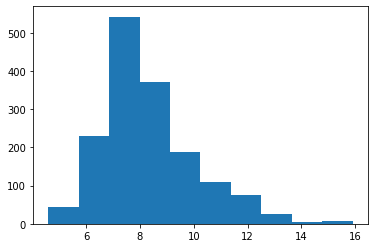

In [ ]:
sl=df["fixed acidity"].copy()
plt.hist(df["fixed acidity"])

In [ ]:
sl.loc[df["fixed acidity"]<6]="low"
sl.loc[df["fixed acidity"]>=6]="median"
sl.loc[df["fixed acidity"]>=12]="high"
sl

0       median
1       median
2       median
3       median
4       median
         ...  
1594    median
1595       low
1596    median
1597       low
1598    median
Name: fixed acidity, Length: 1599, dtype: object

In [ ]:
classes=np.unique(np.array(sl))
classes

array(['high', 'low', 'median'], dtype=object)

Scatter plot for range normalization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


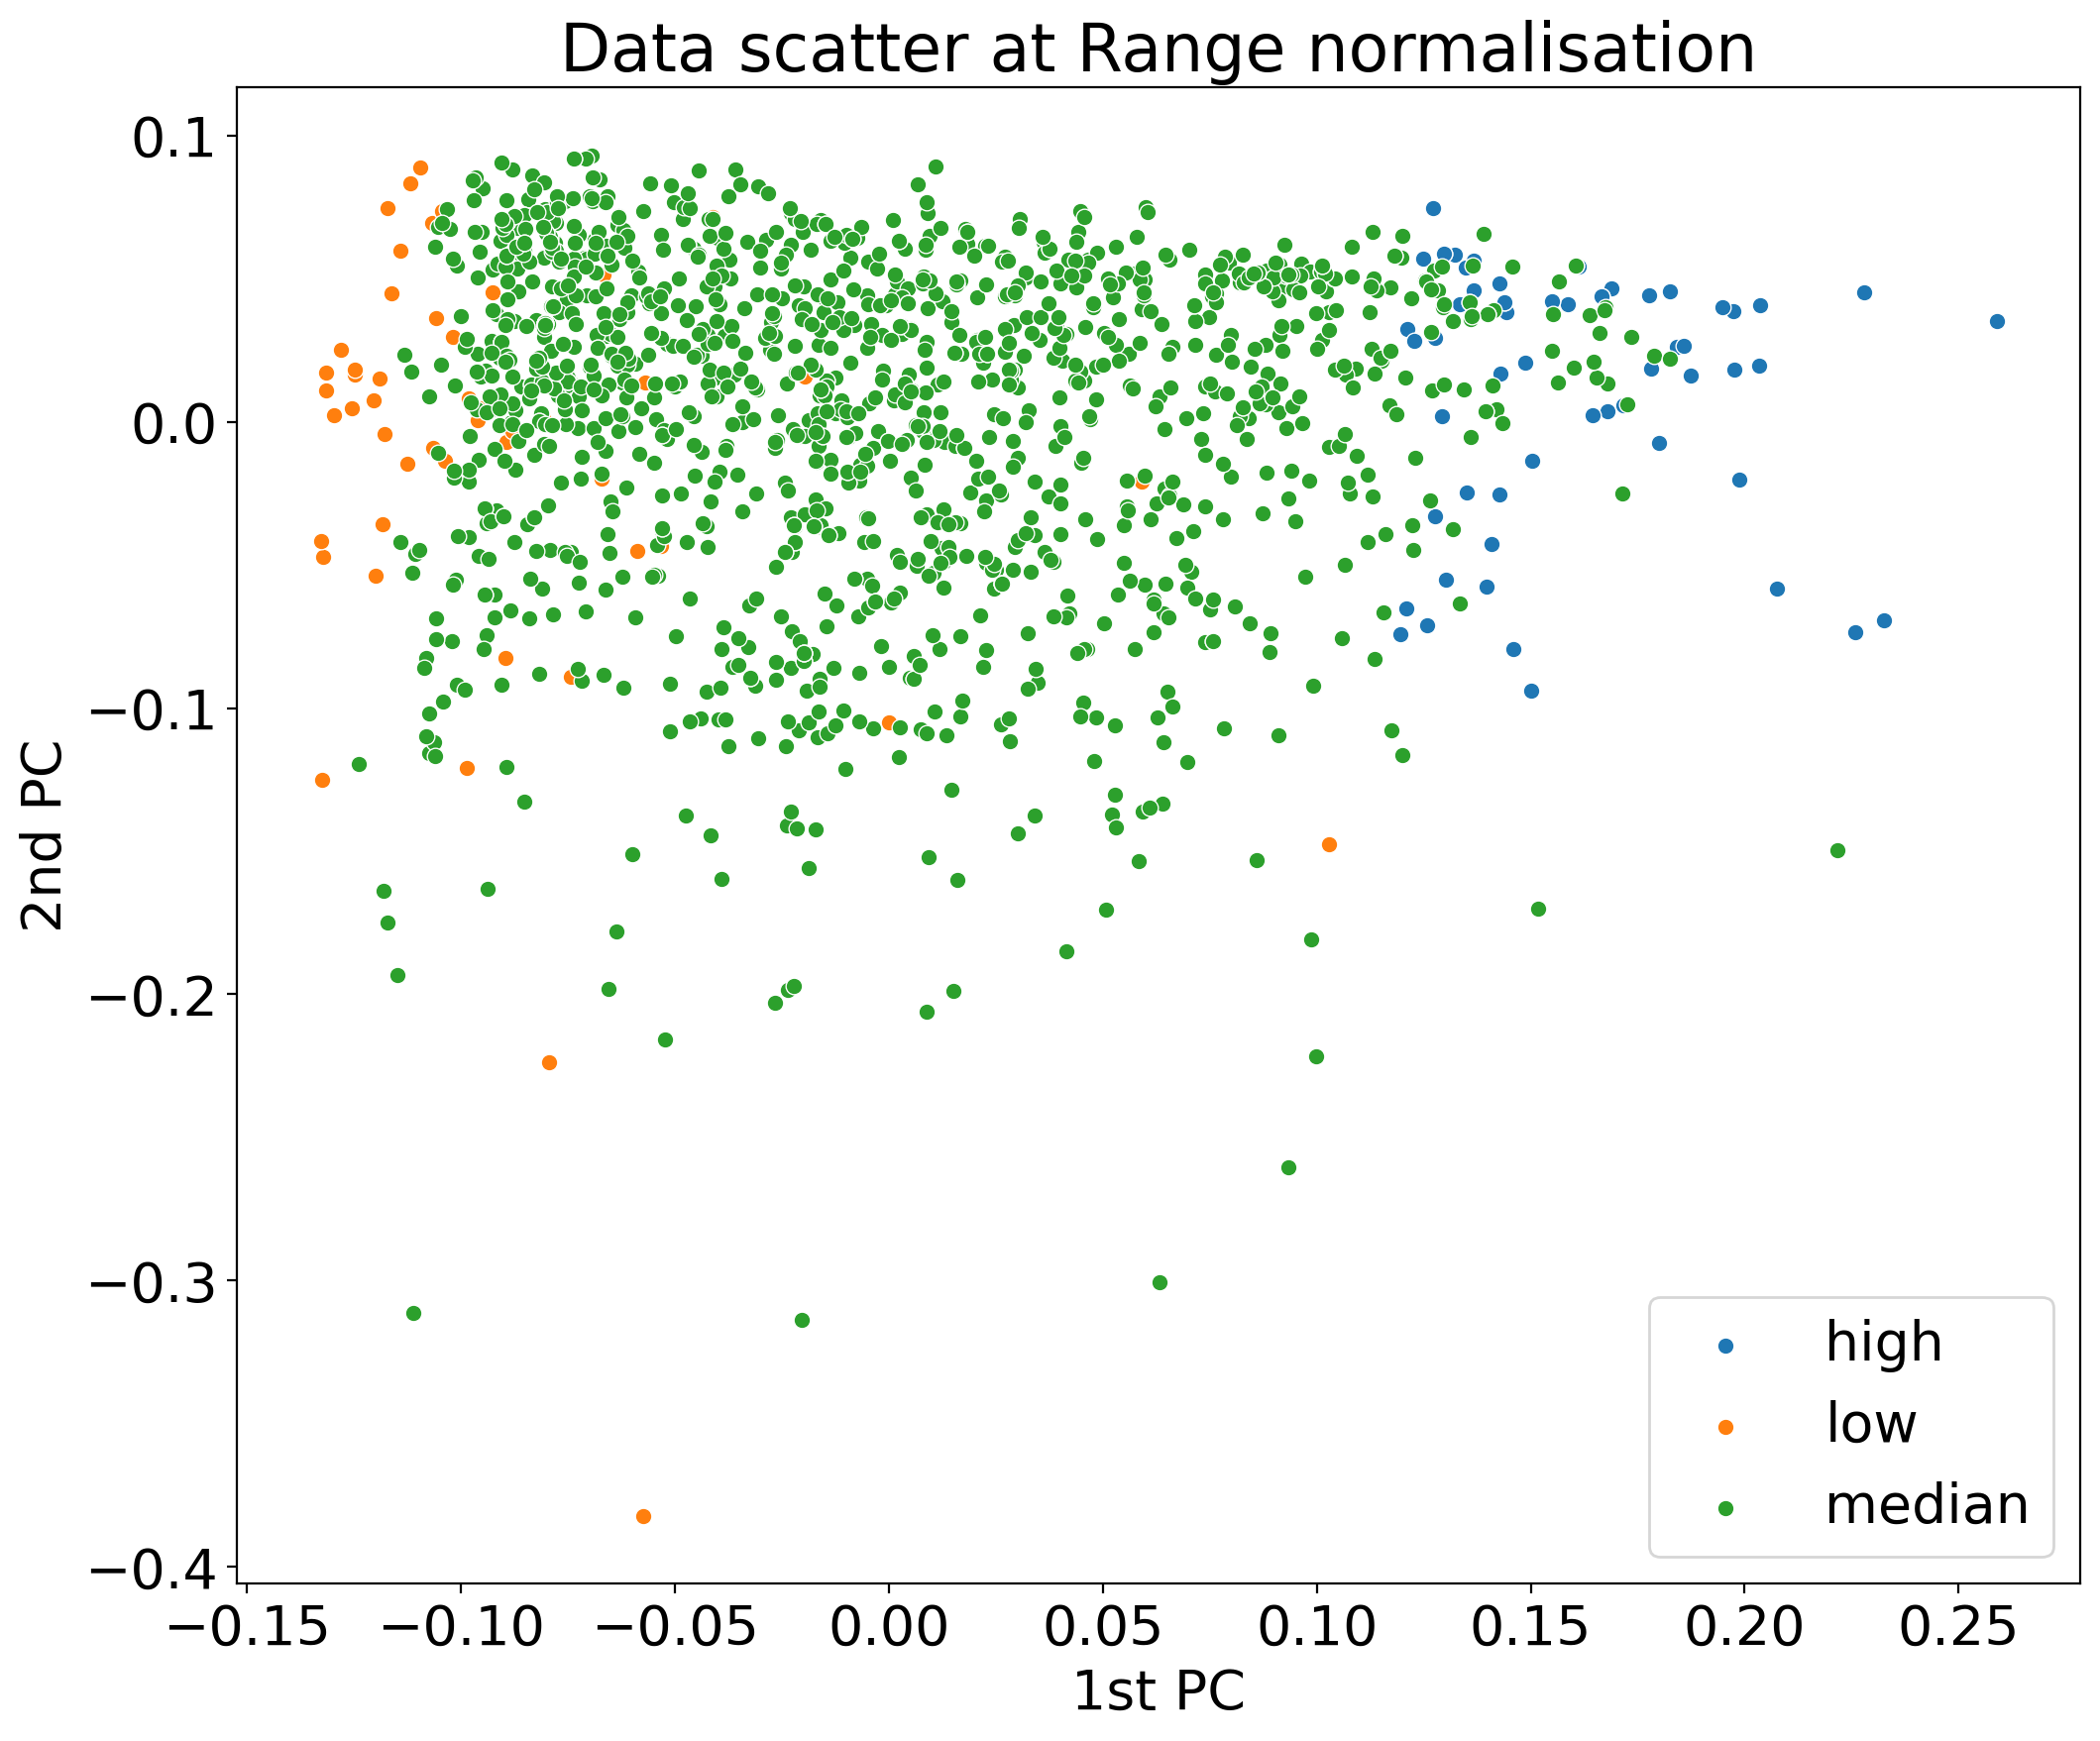

In [ ]:
plt.figure(figsize=(12,10), dpi= 200)
plt.rcParams['font.size'] = '20'
for i in classes:
  xs = np.sqrt(ss[1][0])*pd.DataFrame(us[1][:, 0]).loc[sl==i, :][0]
  ys = np.sqrt(ss[1][1])*pd.DataFrame(us[1][:, 1]).loc[sl==i, :][0]
  sns.scatterplot(xs, ys, label = i)
plt.title("Data scatter at Range normalisation")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.savefig("PCArange.png")

Scatter plot for z-scoring

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


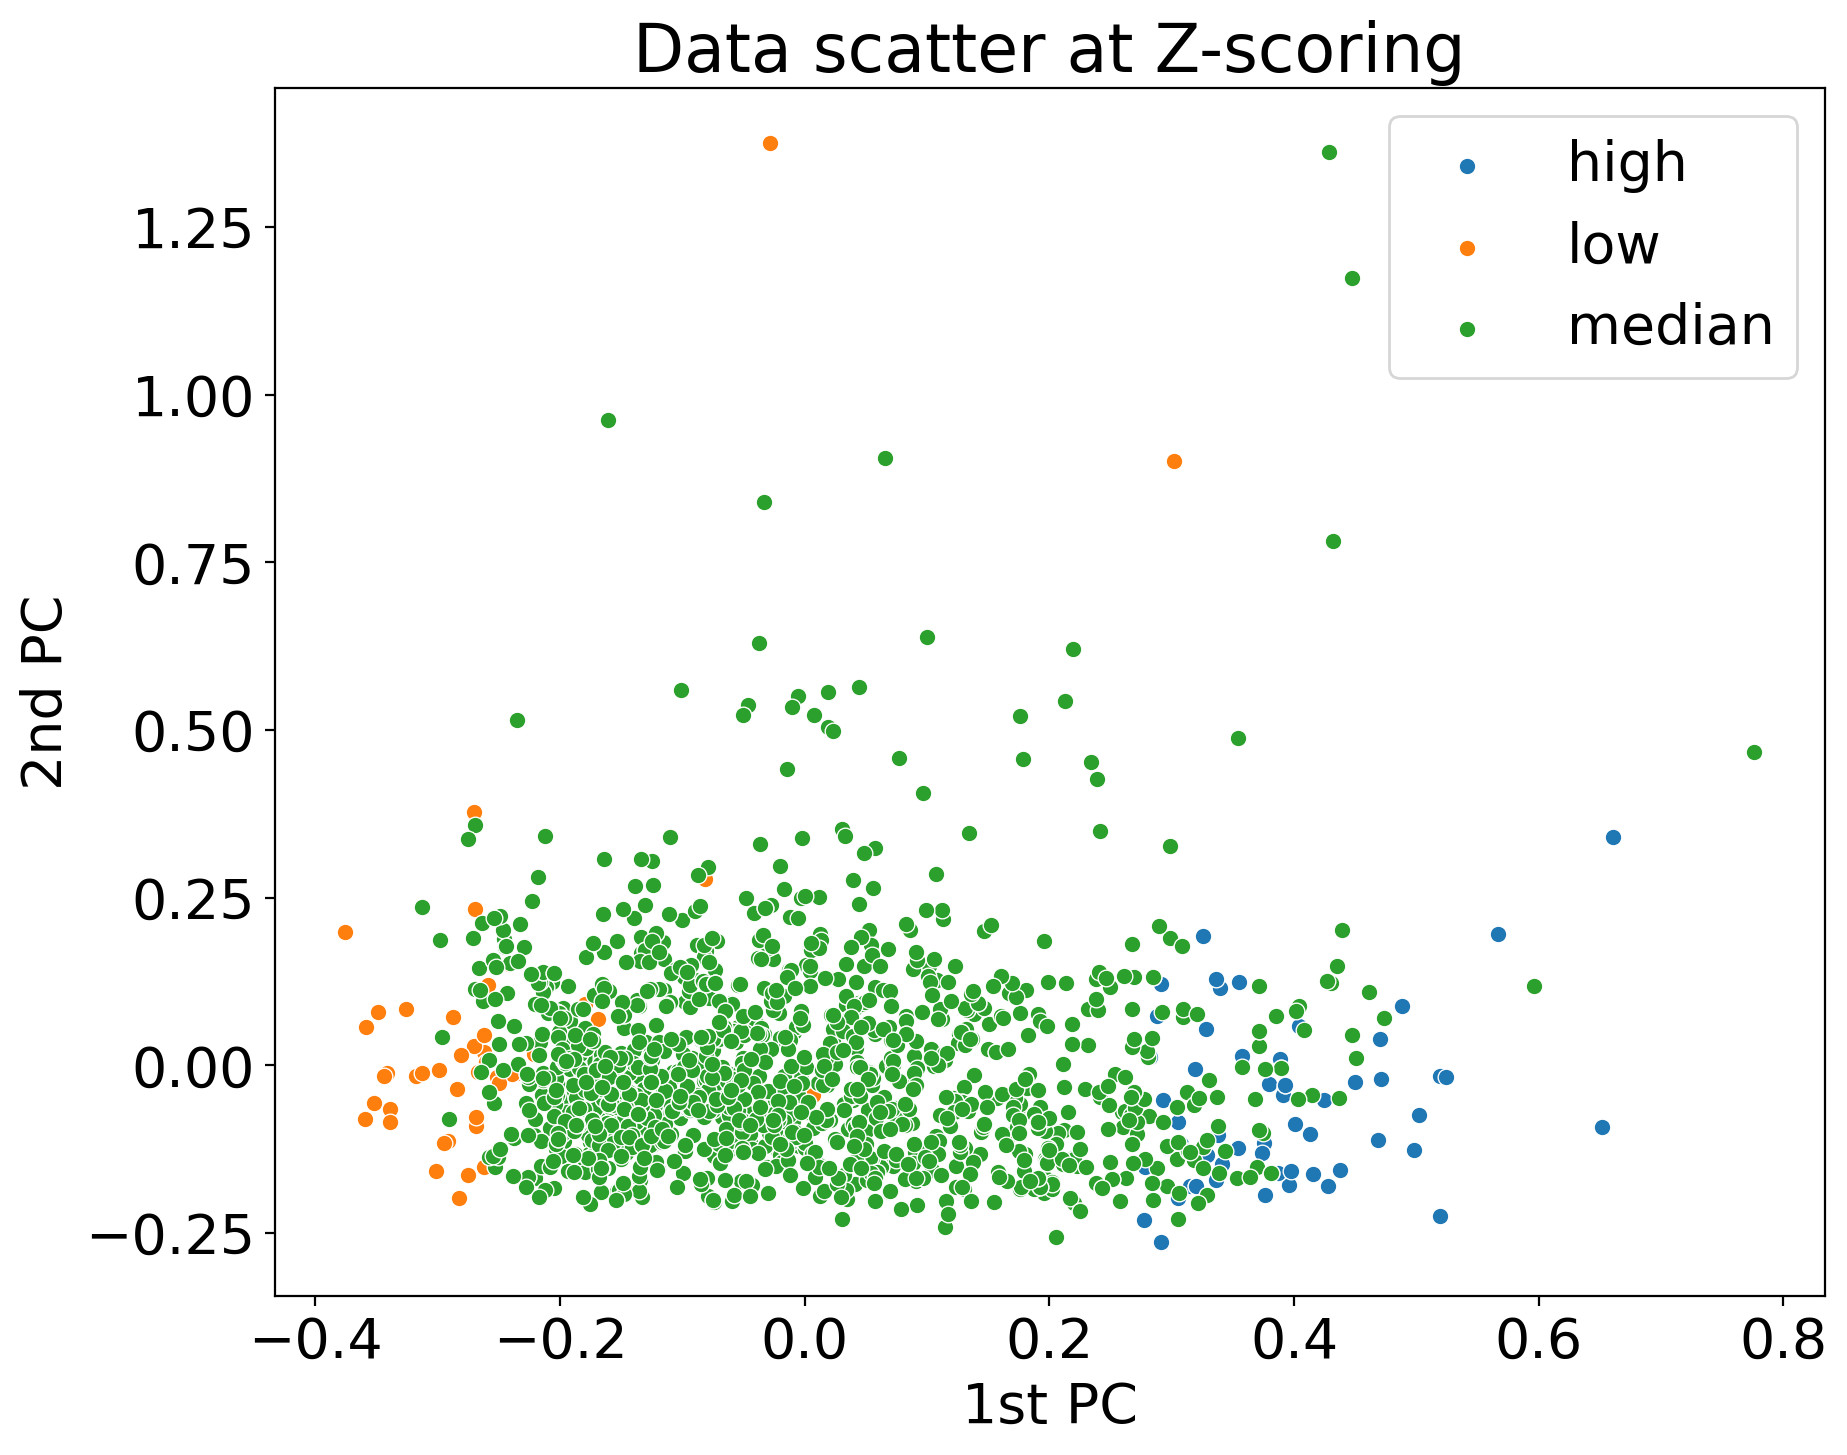

In [ ]:
plt.figure(figsize=(10,8), dpi= 200)
plt.rcParams['font.size'] = '20'
for i in classes:
  xs = np.sqrt(ss[0][0])*pd.DataFrame(us[0][:, 0]).loc[sl==i, :][0]
  ys = np.sqrt(ss[0][1])*pd.DataFrame(us[0][:, 1]).loc[sl==i, :][0]
  sns.scatterplot(xs, ys, label = i)
plt.title("Data scatter at Z-scoring")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.savefig("PCAz.png")

Conventional PCA

In [ ]:
cov=np.array(np.transpose(z_scoring))@np.array(z_scoring)/z_scoring.shape[0]
cov

array([[ 1.        ,  0.67170343,  0.11477672,  0.09370519, -0.15379419],
       [ 0.67170343,  1.        ,  0.14357716,  0.20382291, -0.06097813],
       [ 0.11477672,  0.14357716,  1.        ,  0.05560954,  0.187049  ],
       [ 0.09370519,  0.20382291,  0.05560954,  1.        ,  0.00556215],
       [-0.15379419, -0.06097813,  0.187049  ,  0.00556215,  1.        ]])

In [ ]:
ei=np.linalg.eig(cov)
ei

(array([1.79163092, 0.31323962, 1.19679951, 0.94665252, 0.75167742]),
 array([[ 0.65275515,  0.69463552, -0.12053469, -0.22980708,  0.15508807],
        [ 0.66841203, -0.70418476, -0.0023184 , -0.07532262,  0.22731106],
        [ 0.20402874, -0.00342459,  0.66020271, -0.23776653, -0.68261263],
        [ 0.26279526,  0.11373829,  0.14729499,  0.94064501, -0.10720732],
        [-0.12824586,  0.09304407,  0.72656905, -0.01300983,  0.66844892]]))

In [ ]:
pc1=z_scoring@ei[1][:, np.argmax(ei[0])]/np.sqrt(z_scoring.shape[0]*np.max(ei[0]))
pc1

0      -0.025628
1      -0.021844
2      -0.018425
3       0.035430
4      -0.025628
          ...   
1594   -0.031986
1595   -0.036790
1596   -0.028041
1597   -0.033088
1598   -0.003243
Length: 1599, dtype: float64

The first component obtained via SVD is for comparison

In [ ]:
us[0][:, 0]

array([-0.02562764, -0.02184396, -0.01842499, ..., -0.02804119,
       -0.03308825, -0.00324294])

In [ ]:
pc2=z_scoring@ei[1][:, 2]/np.sqrt(z_scoring.shape[0]*ei[0][2])
pc2

0      -0.013874
1       0.016799
2      -0.002737
3      -0.010583
4      -0.013874
          ...   
1594    0.023431
1595    0.035157
1596    0.020705
1597    0.022822
1598    0.016891
Length: 1599, dtype: float64

In [ ]:
us[0][:, 1]

array([-0.01387389,  0.01679898, -0.00273674, ...,  0.02070487,
        0.02282202,  0.01689113])

Visualization on components obtained by traditional PCA

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


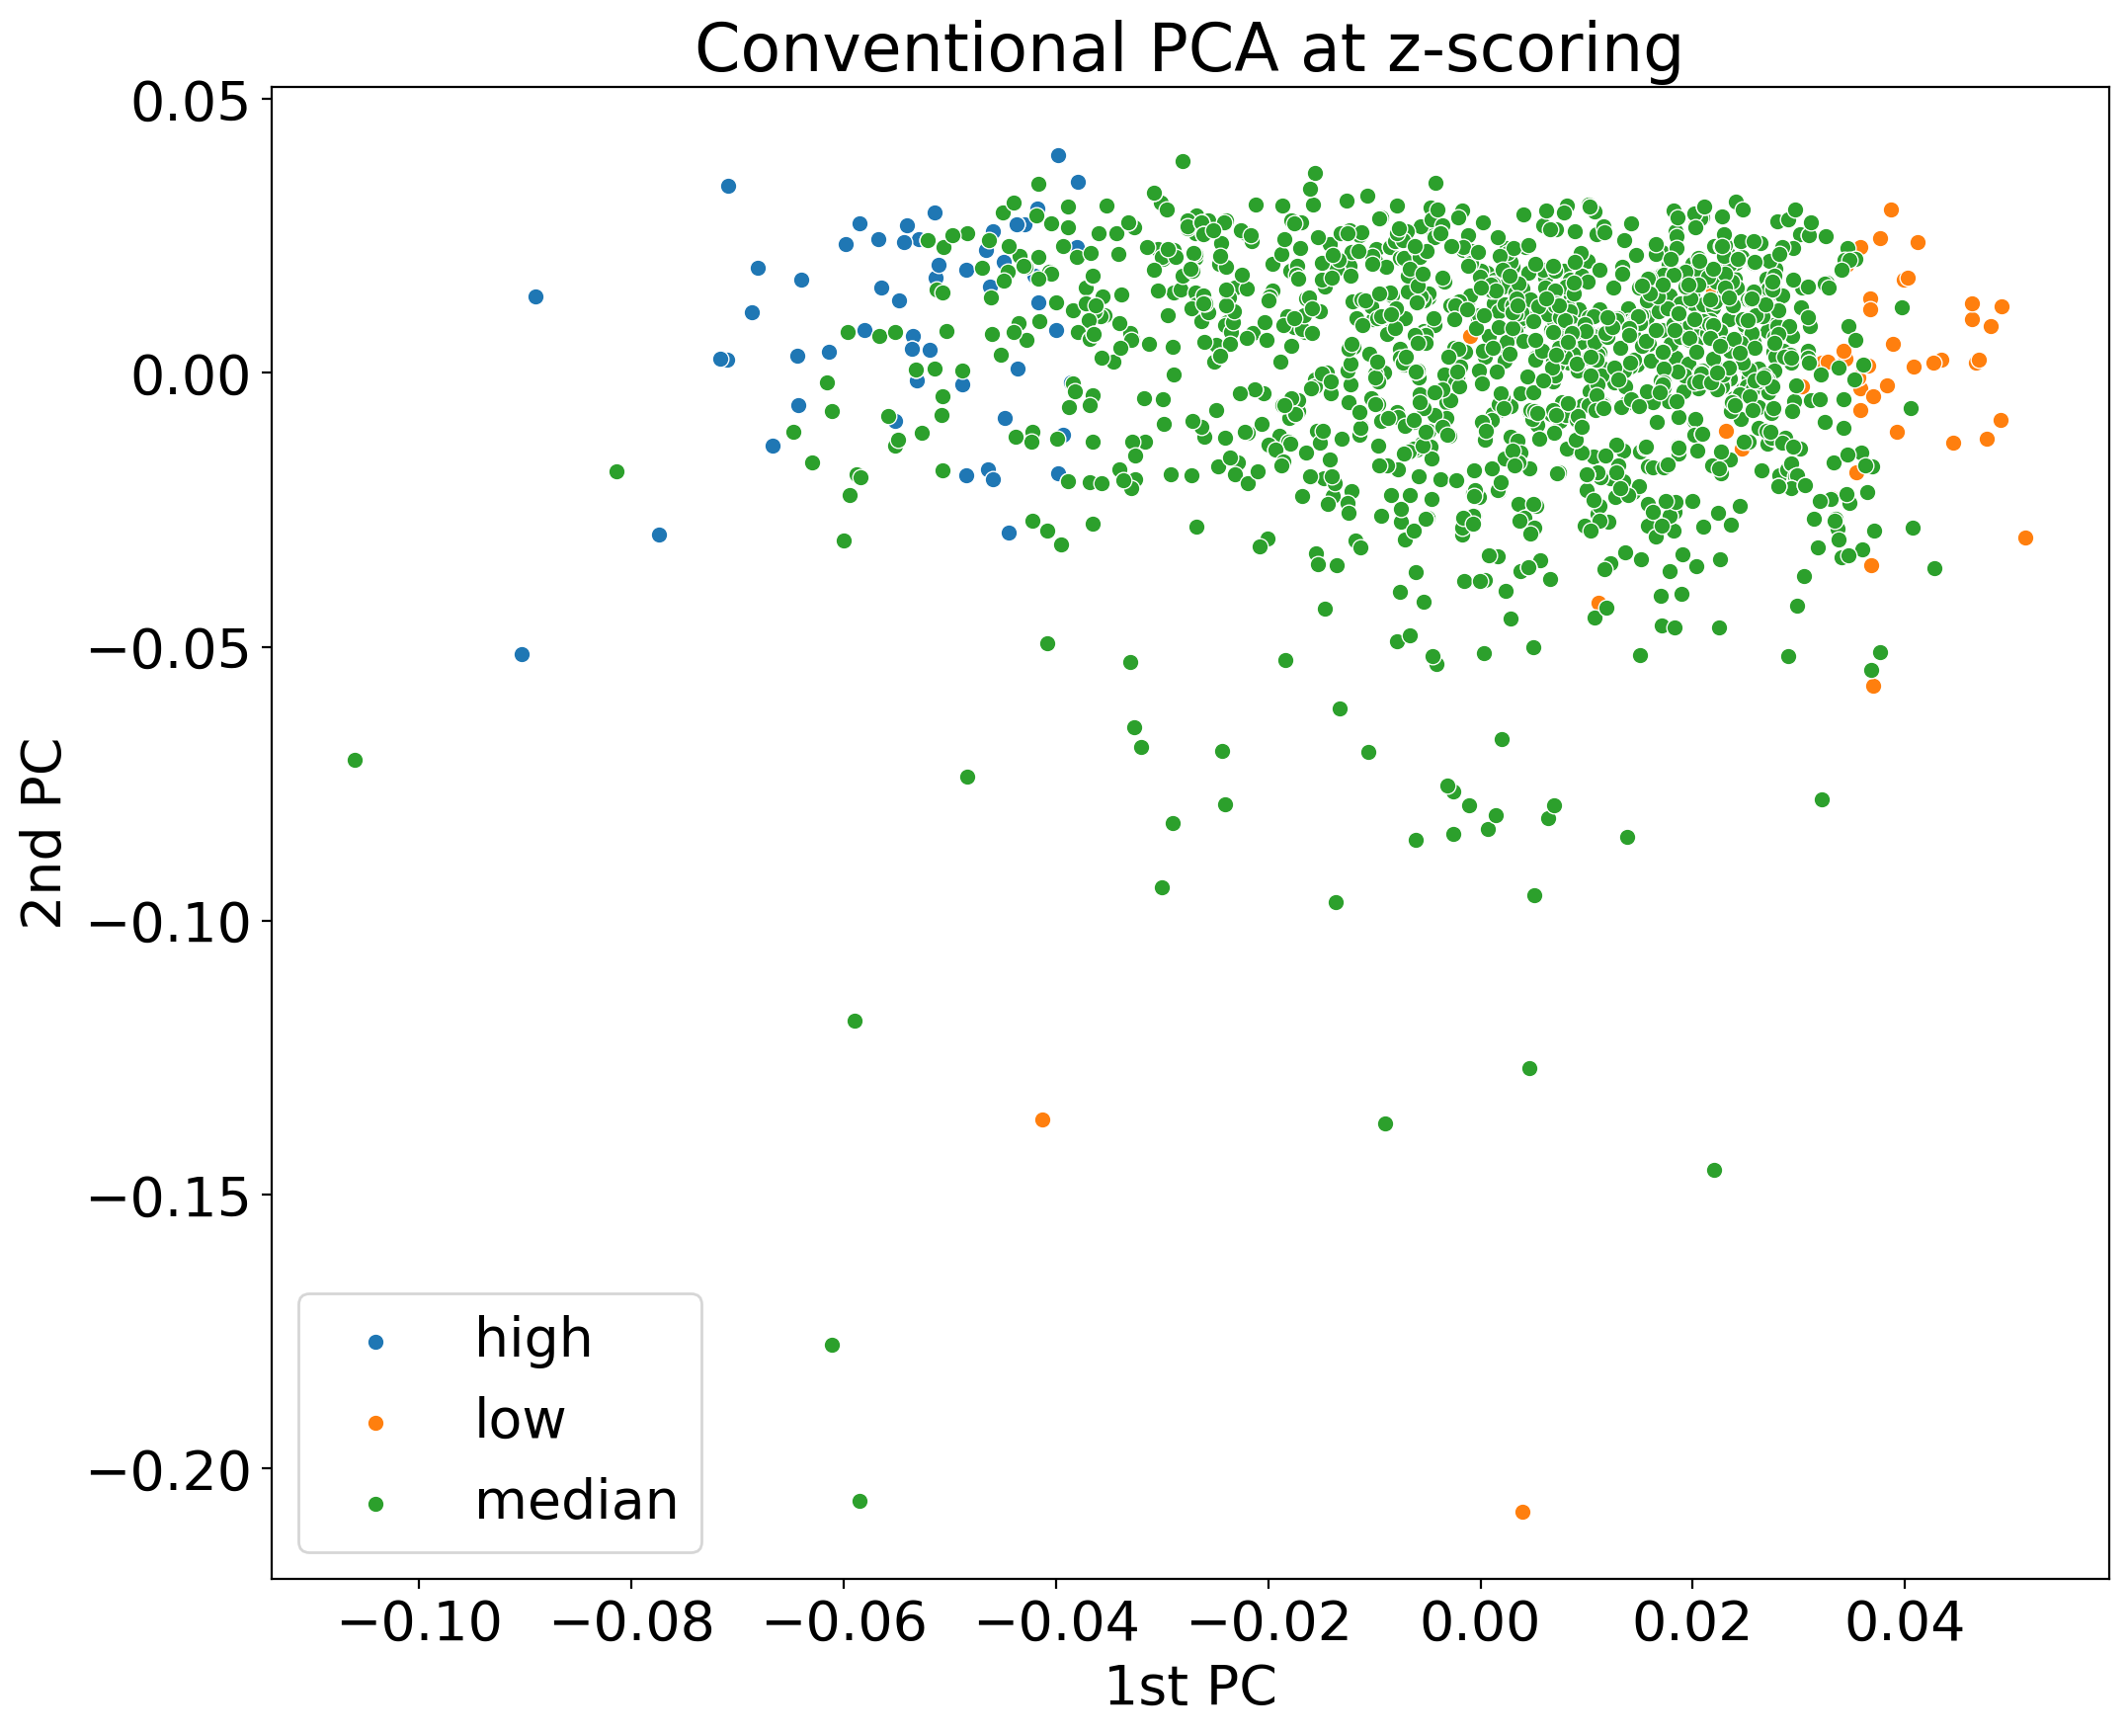

In [ ]:
plt.figure( figsize=(12, 10), dpi=200)
for j in classes:
  sns.scatterplot(-pc1[sl==j], -pc2[sl==j], label=j)
plt.legend()
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("Conventional PCA at z-scoring")
plt.savefig("cPCA.png")

Finding the hidden factor

In [ ]:
u, s, v = np.linalg.svd(rank)
u*=-1
v*=-1
v

array([[ 0.65034063,  0.58287361,  0.21062505,  0.22839546,  0.37521731],
       [ 0.20971278,  0.420926  , -0.18728461, -0.08947846, -0.8577645 ],
       [ 0.66896549, -0.69142974,  0.14631992,  0.07964373, -0.21600335],
       [-0.24796682,  0.05040612,  0.92347206,  0.14001244, -0.25212604],
       [ 0.15516201,  0.04963672,  0.21529374, -0.95597202,  0.11500889]])

Hidden factor

In [ ]:
alpha=1/sum(v[:, 0])
alpha

0.6962750252050728

Coefficients for the equation

In [ ]:
alpha*v[:,0]

array([ 0.45281594,  0.14601777,  0.46578396, -0.1726531 ,  0.10803543])

The proportion of the explicable spread

In [ ]:
100*s[0]**2/np.sum(np.sum(rank**2))

83.67093904876398